# Разведочный анализ данных: начало

Мы будем работать с датасетом про алмазы - в нем содержатся их различные характеристики, а также стоимость.

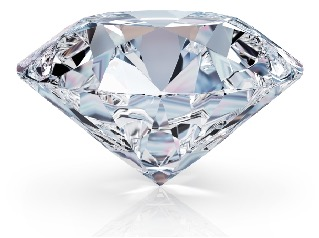

[Интересная статья про качество алмазов](https://www.diamonds.pro/education/diamond-depth-and-table/)

**Цели на сегодня:**

* понять влияние различных характеристик алмазов на их качество и стоимость

* научиться делать разведочный анализ данных

* изучить библиотеки pandas, numpy и matplotlib, seaborn

[Pandas cheatsheet](https://images.datacamp.com/image/upload/v1676302204/Marketing/Blog/Pandas_Cheat_Sheet.pdf)

## Импорт библиотек и загрузка данных

In [45]:
import polars as pl
import matplotlib.pyplot as plt;
import seaborn as sns
import numpy as np

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
DIAMONDS_DATASET = "/content/drive/My Drive/ML_data_kt/diamonds_good.csv"

In [5]:
df = pl.read_csv(DIAMONDS_DATASET)

## Описание данных

* `carat` - число каратов алмаза
* `cut` - огранка алмаза
* `color` - цвет алмаза
* `clarity` - прозрачность алмаза
* `depth` - глубина алмаза
* `table` - платформа алмаза (грань, которую можно увидеть, если смотреть на камень лицевой стороной вверх)
* `price` - цена алмаза
* `x` - размер алмаза по оси x
* `y` - размер алмаза по оси y
* `z` - размер алмаза по оси z

In [6]:
df.head(10)

shape: (10, 10)
┌───────┬───────────┬───────┬─────────┬───┬───────┬──────┬──────┬──────┐
│ carat ┆ cut       ┆ color ┆ clarity ┆ … ┆ price ┆ 'x'  ┆ 'y'  ┆ 'z'  │
│ ---   ┆ ---       ┆ ---   ┆ ---     ┆   ┆ ---   ┆ ---  ┆ ---  ┆ ---  │
│ f64   ┆ str       ┆ str   ┆ str     ┆   ┆ f64   ┆ f64  ┆ f64  ┆ f64  │
╞═══════╪═══════════╪═══════╪═════════╪═══╪═══════╪══════╪══════╪══════╡
│ 0.23  ┆ Ideal     ┆ E     ┆ SI2     ┆ … ┆ 326.0 ┆ 3.95 ┆ 3.98 ┆ 2.43 │
│ 0.21  ┆ Premium   ┆ E     ┆ SI1     ┆ … ┆ 326.0 ┆ 3.89 ┆ 3.84 ┆ 2.31 │
│ 0.23  ┆ Good      ┆ E     ┆ VS1     ┆ … ┆ 327.0 ┆ 4.05 ┆ 4.07 ┆ 2.31 │
│ 0.29  ┆ Premium   ┆ I     ┆ VS2     ┆ … ┆ 334.0 ┆ 4.2  ┆ 4.23 ┆ 2.63 │
│ 0.31  ┆ Good      ┆ J     ┆ SI2     ┆ … ┆ 335.0 ┆ 4.34 ┆ 4.35 ┆ 2.75 │
│ null  ┆ Very Good ┆ J     ┆ VVS2    ┆ … ┆ 336.0 ┆ 3.94 ┆ 3.96 ┆ 2.48 │
│ 0.24  ┆ Very Good ┆ I     ┆ VVS1    ┆ … ┆ 336.0 ┆ 3.95 ┆ 3.98 ┆ 2.47 │
│ 0.26  ┆ Very Good ┆ H     ┆ SI1     ┆ … ┆ 337.0 ┆ 4.07 ┆ 4.11 ┆ 2.53 │
│ 0.22  ┆ Fair      ┆ E     ┆ VS2     ┆ … ┆ 337.0 ┆ 3.87 ┆ 3.78 ┆ 2.49 │
│ 0.23  ┆ Very Good ┆ H     ┆ VS1     ┆ … ┆ 338.0 ┆ 4.0  ┆ 4.05 ┆ 2.39 │
└───────┴───────────┴───────┴─────────┴───┴───────┴──────┴──────┴──────┘

In [7]:
df.tail()

shape: (5, 10)
┌───────┬───────────┬───────┬─────────┬───┬────────┬──────┬──────┬──────┐
│ carat ┆ cut       ┆ color ┆ clarity ┆ … ┆ price  ┆ 'x'  ┆ 'y'  ┆ 'z'  │
│ ---   ┆ ---       ┆ ---   ┆ ---     ┆   ┆ ---    ┆ ---  ┆ ---  ┆ ---  │
│ f64   ┆ str       ┆ str   ┆ str     ┆   ┆ f64    ┆ f64  ┆ f64  ┆ f64  │
╞═══════╪═══════════╪═══════╪═════════╪═══╪════════╪══════╪══════╪══════╡
│ 0.72  ┆ Ideal     ┆ D     ┆ SI1     ┆ … ┆ 2757.0 ┆ 5.75 ┆ 5.76 ┆ 3.5  │
│ 0.72  ┆ Good      ┆ D     ┆ SI1     ┆ … ┆ 2757.0 ┆ 5.69 ┆ 5.75 ┆ 3.61 │
│ 0.7   ┆ Very Good ┆ D     ┆ SI1     ┆ … ┆ 2757.0 ┆ 5.66 ┆ 5.68 ┆ 3.56 │
│ 0.86  ┆ Premium   ┆ H     ┆ SI2     ┆ … ┆ 2757.0 ┆ 6.15 ┆ 6.12 ┆ 3.74 │
│ 0.75  ┆ Ideal     ┆ D     ┆ SI2     ┆ … ┆ 2757.0 ┆ 5.83 ┆ 5.87 ┆ 3.64 │
└───────┴───────────┴───────┴─────────┴───┴────────┴──────┴──────┴──────┘

In [8]:
df.sample(3)

shape: (3, 10)
┌───────┬───────────┬───────┬─────────┬───┬────────┬──────┬──────┬──────┐
│ carat ┆ cut       ┆ color ┆ clarity ┆ … ┆ price  ┆ 'x'  ┆ 'y'  ┆ 'z'  │
│ ---   ┆ ---       ┆ ---   ┆ ---     ┆   ┆ ---    ┆ ---  ┆ ---  ┆ ---  │
│ f64   ┆ str       ┆ str   ┆ str     ┆   ┆ f64    ┆ f64  ┆ f64  ┆ f64  │
╞═══════╪═══════════╪═══════╪═════════╪═══╪════════╪══════╪══════╪══════╡
│ 0.71  ┆ Very Good ┆ J     ┆ VS2     ┆ … ┆ 1902.0 ┆ 5.68 ┆ 5.72 ┆ 3.57 │
│ 0.31  ┆ Ideal     ┆ D     ┆ SI1     ┆ … ┆ 571.0  ┆ 4.32 ┆ 4.37 ┆ 2.64 │
│ 0.5   ┆ Very Good ┆ F     ┆ VVS1    ┆ … ┆ 2122.0 ┆ 5.14 ┆ 5.18 ┆ 3.15 │
└───────┴───────────┴───────┴─────────┴───┴────────┴──────┴──────┴──────┘

## Исследование данных

Размер датасета

In [9]:
df.shape

(53940, 10)

Информация о типах данных и пропусках

In [12]:
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns}")
print(f"Schema: {df.schema}")
print(f"Null counts:\n{df.null_count()}")

Shape: (53940, 10)
Columns: ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', "'x'", "'y'", "'z'"]
Schema: Schema({'carat': Float64, 'cut': String, 'color': String, 'clarity': String, 'depth': Float64, 'table': Float64, 'price': Float64, "'x'": Float64, "'y'": Float64, "'z'": Float64})
Null counts:
shape: (1, 10)
┌───────┬─────┬───────┬─────────┬───┬───────┬─────┬─────┬─────┐
│ carat ┆ cut ┆ color ┆ clarity ┆ … ┆ price ┆ 'x' ┆ 'y' ┆ 'z' │
│ ---   ┆ --- ┆ ---   ┆ ---     ┆   ┆ ---   ┆ --- ┆ --- ┆ --- │
│ u32   ┆ u32 ┆ u32   ┆ u32     ┆   ┆ u32   ┆ u32 ┆ u32 ┆ u32 │
╞═══════╪═════╪═══════╪═════════╪═══╪═══════╪═════╪═════╪═════╡
│ 498   ┆ 0   ┆ 0     ┆ 0       ┆ … ┆ 0     ┆ 0   ┆ 5   ┆ 0   │
└───────┴─────┴───────┴─────────┴───┴───────┴─────┴─────┴─────┘


Основные числовые характеристики

In [13]:
df.describe()

shape: (9, 11)
┌────────────┬──────────┬───────────┬───────┬───┬─────────────┬──────────┬──────────┬──────────┐
│ statistic  ┆ carat    ┆ cut       ┆ color ┆ … ┆ price       ┆ 'x'      ┆ 'y'      ┆ 'z'      │
│ ---        ┆ ---      ┆ ---       ┆ ---   ┆   ┆ ---         ┆ ---      ┆ ---      ┆ ---      │
│ str        ┆ f64      ┆ str       ┆ str   ┆   ┆ f64         ┆ f64      ┆ f64      ┆ f64      │
╞════════════╪══════════╪═══════════╪═══════╪═══╪═════════════╪══════════╪══════════╪══════════╡
│ count      ┆ 53442.0  ┆ 53940     ┆ 53940 ┆ … ┆ 53940.0     ┆ 53940.0  ┆ 53935.0  ┆ 53940.0  │
│ null_count ┆ 498.0    ┆ 0         ┆ 0     ┆ … ┆ 0.0         ┆ 0.0      ┆ 5.0      ┆ 0.0      │
│ mean       ┆ 0.797561 ┆ null      ┆ null  ┆ … ┆ 3932.799722 ┆ 5.731157 ┆ 5.734469 ┆ 3.538734 │
│ std        ┆ 0.473534 ┆ null      ┆ null  ┆ … ┆ 3989.439738 ┆ 1.121761 ┆ 1.142125 ┆ 0.705699 │
│ min        ┆ 0.2      ┆ Fair      ┆ D     ┆ … ┆ 326.0       ┆ 0.0      ┆ 0.0      ┆ 0.0      │
│ 25%        ┆ 0.4      ┆ null      ┆ null  ┆ … ┆ 950.0       ┆ 4.71     ┆ 4.72     ┆ 2.91     │
│ 50%        ┆ 0.7      ┆ null      ┆ null  ┆ … ┆ 2401.0      ┆ 5.7      ┆ 5.71     ┆ 3.53     │
│ 75%        ┆ 1.04     ┆ null      ┆ null  ┆ … ┆ 5324.0      ┆ 6.54     ┆ 6.54     ┆ 4.04     │
│ max        ┆ 5.01     ┆ Very Good ┆ J     ┆ … ┆ 18823.0     ┆ 10.74    ┆ 58.9     ┆ 31.8     │
└────────────┴──────────┴───────────┴───────┴───┴─────────────┴──────────┴──────────┴──────────┘

In [15]:
string_cols = [col for col, dtype in df.schema.items()
               if dtype in (pl.String, pl.Categorical, pl.Utf8)]

if string_cols:
    result = df.select(string_cols).describe()
    print(result)
else:
    print("Нет строковых колонок")

shape: (9, 4)
┌────────────┬───────────┬───────┬─────────┐
│ statistic  ┆ cut       ┆ color ┆ clarity │
│ ---        ┆ ---       ┆ ---   ┆ ---     │
│ str        ┆ str       ┆ str   ┆ str     │
╞════════════╪═══════════╪═══════╪═════════╡
│ count      ┆ 53940     ┆ 53940 ┆ 53940   │
│ null_count ┆ 0         ┆ 0     ┆ 0       │
│ mean       ┆ null      ┆ null  ┆ null    │
│ std        ┆ null      ┆ null  ┆ null    │
│ min        ┆ Fair      ┆ D     ┆ I1      │
│ 25%        ┆ null      ┆ null  ┆ null    │
│ 50%        ┆ null      ┆ null  ┆ null    │
│ 75%        ┆ null      ┆ null  ┆ null    │
│ max        ┆ Very Good ┆ J     ┆ VVS2    │
└────────────┴───────────┴───────┴─────────┘


In [19]:
duplicate_count = df.height - df.unique().height
duplicate_count

135

In [ ]:
# df[условие фильтрации]

In [20]:
duplicates_df = df.filter(
    pl.struct(df.columns).is_duplicated()
)

print(duplicates_df)

shape: (267, 10)
┌───────┬───────┬───────┬─────────┬───┬────────┬──────┬──────┬──────┐
│ carat ┆ cut   ┆ color ┆ clarity ┆ … ┆ price  ┆ 'x'  ┆ 'y'  ┆ 'z'  │
│ ---   ┆ ---   ┆ ---   ┆ ---     ┆   ┆ ---    ┆ ---  ┆ ---  ┆ ---  │
│ f64   ┆ str   ┆ str   ┆ str     ┆   ┆ f64    ┆ f64  ┆ f64  ┆ f64  │
╞═══════╪═══════╪═══════╪═════════╪═══╪════════╪══════╪══════╪══════╡
│ 0.79  ┆ Ideal ┆ G     ┆ SI1     ┆ … ┆ 2898.0 ┆ 5.9  ┆ 5.85 ┆ 3.66 │
│ 0.79  ┆ Ideal ┆ G     ┆ SI1     ┆ … ┆ 2898.0 ┆ 5.9  ┆ 5.85 ┆ 3.66 │
│ 0.79  ┆ Ideal ┆ G     ┆ SI1     ┆ … ┆ 2898.0 ┆ 5.9  ┆ 5.85 ┆ 3.66 │
│ 0.79  ┆ Ideal ┆ G     ┆ SI1     ┆ … ┆ 2898.0 ┆ 5.9  ┆ 5.85 ┆ 3.66 │
│ 0.79  ┆ Ideal ┆ G     ┆ SI1     ┆ … ┆ 2898.0 ┆ 5.9  ┆ 5.85 ┆ 3.66 │
│ …     ┆ …     ┆ …     ┆ …       ┆ … ┆ …      ┆ …    ┆ …    ┆ …    │
│ 0.71  ┆ Good  ┆ F     ┆ SI2     ┆ … ┆ 2130.0 ┆ 0.0  ┆ 0.0  ┆ 0.0  │
│ 0.51  ┆ Ideal ┆ F     ┆ VVS2    ┆ … ┆ 2203.0 ┆ 5.19 ┆ 5.17 ┆ 3.17 │
│ 0.51  ┆ Ideal ┆ F     ┆ VVS2    ┆ … ┆ 2203.0 ┆ 5.19 ┆ 5.17 ┆ 3.17 │
│ 0

In [21]:
# df = df.drop_duplicates()

df = df.unique()

df.shape

(53805, 10)

In [23]:
df.head()

shape: (5, 10)
┌───────┬───────────┬───────┬─────────┬───┬────────┬──────┬──────┬──────┐
│ carat ┆ cut       ┆ color ┆ clarity ┆ … ┆ price  ┆ 'x'  ┆ 'y'  ┆ 'z'  │
│ ---   ┆ ---       ┆ ---   ┆ ---     ┆   ┆ ---    ┆ ---  ┆ ---  ┆ ---  │
│ f64   ┆ str       ┆ str   ┆ str     ┆   ┆ f64    ┆ f64  ┆ f64  ┆ f64  │
╞═══════╪═══════════╪═══════╪═════════╪═══╪════════╪══════╪══════╪══════╡
│ 0.38  ┆ Ideal     ┆ F     ┆ VS1     ┆ … ┆ 988.0  ┆ 4.68 ┆ 4.69 ┆ 2.88 │
│ 1.06  ┆ Very Good ┆ E     ┆ VS2     ┆ … ┆ 7079.0 ┆ 6.57 ┆ 6.53 ┆ 4.0  │
│ 0.31  ┆ Ideal     ┆ F     ┆ IF      ┆ … ┆ 766.0  ┆ 4.4  ┆ 4.44 ┆ 2.64 │
│ 1.0   ┆ Ideal     ┆ E     ┆ VS2     ┆ … ┆ 7569.0 ┆ 6.38 ┆ 6.41 ┆ 3.97 │
│ 0.37  ┆ Ideal     ┆ E     ┆ SI1     ┆ … ┆ 649.0  ┆ 4.55 ┆ 4.6  ┆ 2.87 │
└───────┴───────────┴───────┴─────────┴───┴────────┴──────┴──────┴──────┘

## Работа с пропущенными значениями

Стратегии заполнения пропусков:

* если пропусков очень мало (~меньше процента) - строки с пропусками можно удалить или заполнить средним/медианой

* если пропусков мало (~5-10%) - их можно заполнить (средним, медианой, уникальным значением, самым популярным значением, спрогнозировать)

* если пропусков много - можно удалить столбец

* можно пытаться предсказывать пропуски моделью

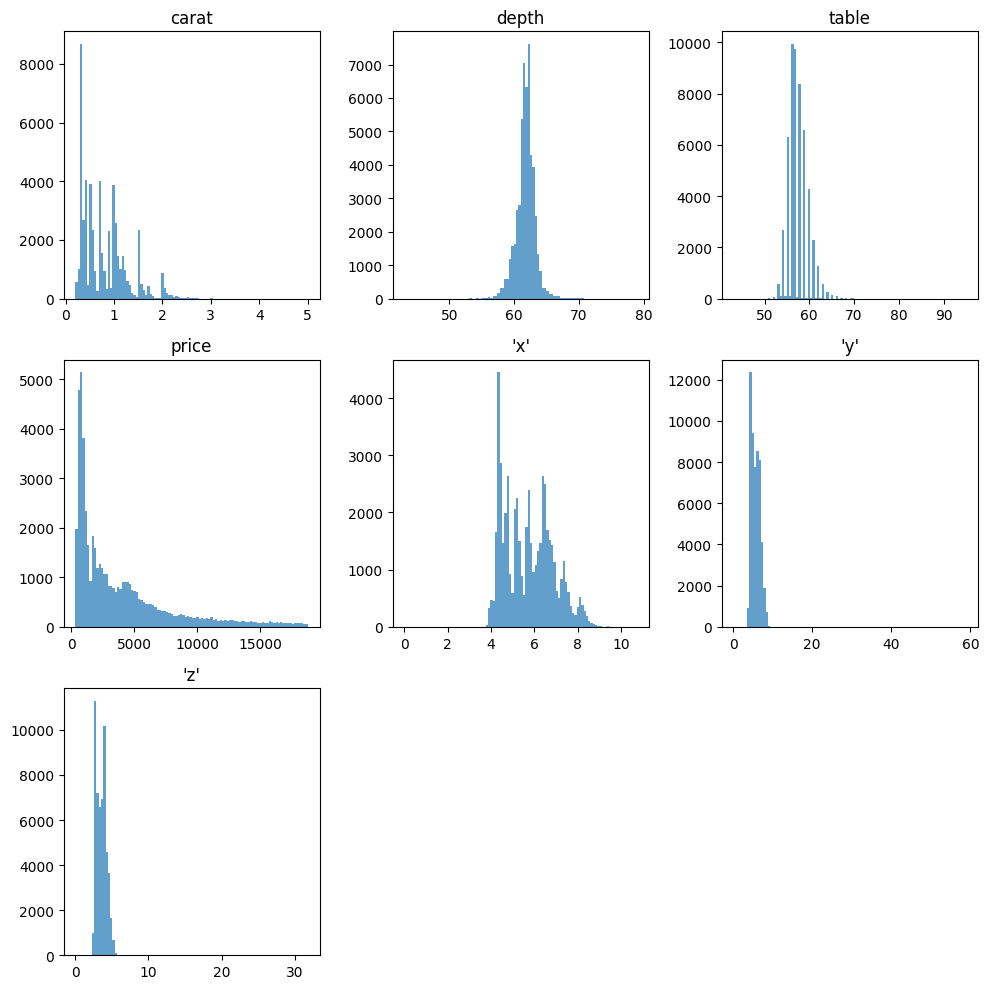

In [29]:
columns_to_plot = ["carat", "depth", "table", "price", "'x'", "'y'", "'z'"]

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    data = df[col].to_numpy()
    axes[i].hist(data, bins=100, alpha=0.7)
    axes[i].set_title(col)

for i in range(7, 9):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [30]:
median_carat = df['carat'].median()

df = df.with_columns(pl.col('carat').fill_null(median_carat))

In [31]:
median_carat = df['depth'].median()

df = df.with_columns(pl.col('depth').fill_null(median_carat))

### Задание 1

Заполните пропуски в столбце `y` медианным значением. Чему равно это значение? Ответ округлите до сотых.

In [32]:
# ваш код здесь
median_y = df["'y'"].median()
median_y

5.71

In [33]:
df = df.with_columns(pl.col("'y'").fill_null(median_y))

## Однофакторный анализ

### Число карат

* мелкие — массой до 0,30 карат (не включительно);
* средние — массой от 0,30 до 1 карат (не включительно);
* крупные – 1 карат и выше, называют солитеры.


Небольшие бриллианты различного размера, полученные при огранке алмаза, и весящие каждый в отдельности менее 0,25 карат, называют *melee (мили)*. Полученные таким же путем более крупные бриллианты различного размера называют *melange (меланж)*.


Бриллианты более 6 карат обычно продаются c аукционов.


Алмазам и бриллиантам более 25 карат присваивают собственные имена.

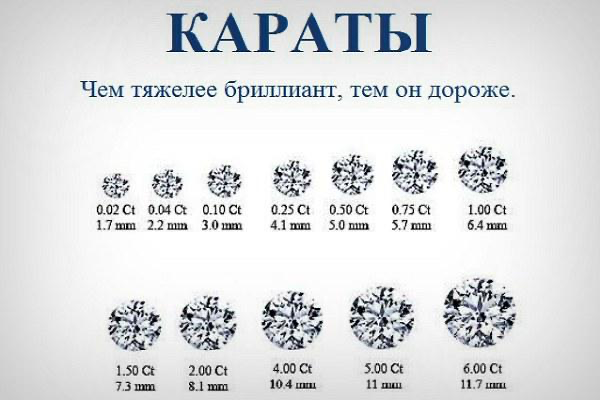

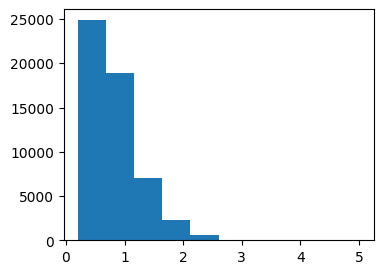

In [34]:
plt.figure(figsize=(4, 3))

plt.hist(df['carat'].to_numpy())
plt.show()

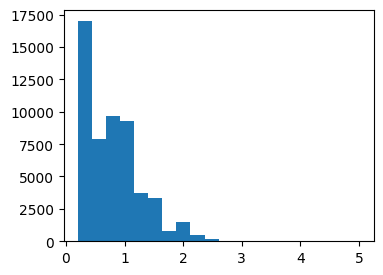

In [35]:
plt.figure(figsize=(4,3))

plt.hist(df['carat'].to_numpy(), bins=20);

Сколько карат весит самый тяжелый бриллиант в датасете? А самый легкий?

In [37]:
df['carat'].min(), df['carat'].max()

(0.2, 5.01)

Сколько мелких бриллиантов в датасете?

In [39]:
df.filter(pl.col('carat') < 0.3).height

1582

Сколько процентов бриллиантов среди всего датасета - крупные?

In [42]:
100 * df.filter(pl.col('carat') >= 1).height / df.height

35.00046464083264

Посмотрим как число карат влияет на стоимость алмаза

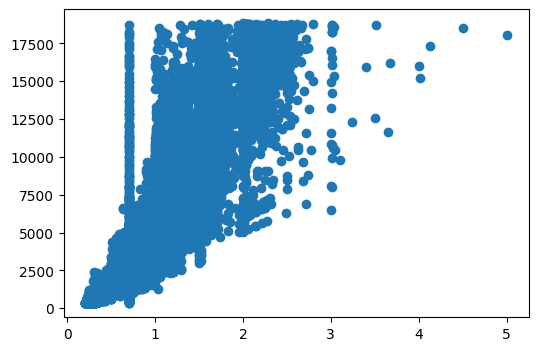

In [43]:
plt.figure(figsize=(6,4))

plt.scatter(df['carat'].to_numpy(), df['price'].to_numpy());

In [46]:
np.corrcoef(df['carat'].to_numpy(), df['price'].to_numpy())[0][1]

np.float64(0.9164989435440212)

### Cut (огранка алмаза)

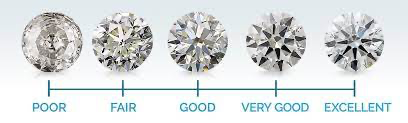

In [47]:
df['cut'].value_counts(normalize=True)

shape: (6, 2)
┌───────────┬────────────┐
│ cut       ┆ proportion │
│ ---       ┆ ---        │
│ str       ┆ f64        │
╞═══════════╪════════════╡
│ Goood     ┆ 0.001487   │
│ Good      ┆ 0.090772   │
│ Very Good ┆ 0.224013   │
│ Premium   ┆ 0.255088   │
│ Ideal     ┆ 0.398941   │
│ Fair      ┆ 0.0297     │
└───────────┴────────────┘

In [49]:
df = df.with_columns(pl.col('cut').replace('Goood', 'Good'))

Посмотрим как влияет огранка алмаза на его стоимость

/tmp/ipython-input-1625806102.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cut', y='price', data = df, palette='summer')


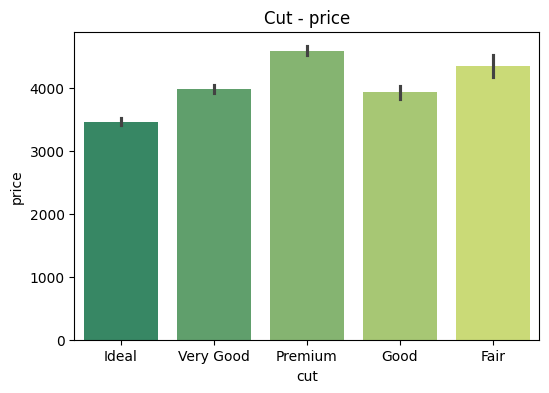

In [50]:
plt.figure(figsize=(6,4))

sns.barplot(x='cut', y='price', data = df, palette='summer')
plt.title('Cut - price')
plt.show();

### Задание 2

Какое максимальное число карат весит алмаз огранки `Fair`?
Ответ округлите до сотых.

In [52]:
# ваш код здесь
df.filter(pl.col('cut') == 'Fair')['carat'].max()

5.01

Посчитаем среднюю стоимость алмазов в каждой категории

In [56]:
df.group_by('cut').agg(pl.col('price').mean().alias('mean_price'))

shape: (5, 2)
┌───────────┬─────────────┐
│ cut       ┆ mean_price  │
│ ---       ┆ ---         │
│ str       ┆ f64         │
╞═══════════╪═════════════╡
│ Ideal     ┆ 3462.59385  │
│ Premium   ┆ 4581.864918 │
│ Good      ┆ 3926.266317 │
│ Very Good ┆ 3982.162781 │
│ Fair      ┆ 4347.735294 │
└───────────┴─────────────┘

Посчитаем несколько характеристик в зависимости от огранки

In [58]:
df.group_by('cut').agg(
    pl.col('price').mean().alias('PriceMean'),
    pl.col('price').median().alias('PriceMedian'),
    pl.col('carat').mean().alias('CaratMean')
)

shape: (5, 4)
┌───────────┬─────────────┬─────────────┬───────────┐
│ cut       ┆ PriceMean   ┆ PriceMedian ┆ CaratMean │
│ ---       ┆ ---         ┆ ---         ┆ ---       │
│ str       ┆ f64         ┆ f64         ┆ f64       │
╞═══════════╪═════════════╪═════════════╪═══════════╡
│ Fair      ┆ 4347.735294 ┆ 3282.0      ┆ 1.040094  │
│ Ideal     ┆ 3462.59385  ┆ 1813.0      ┆ 0.703331  │
│ Very Good ┆ 3982.162781 ┆ 2649.0      ┆ 0.804177  │
│ Good      ┆ 3926.266317 ┆ 3029.5      ┆ 0.845796  │
│ Premium   ┆ 4581.864918 ┆ 3175.0      ┆ 0.889616  │
└───────────┴─────────────┴─────────────┴───────────┘

In [61]:
df.group_by('cut').agg(
        pl.col('price').mean().alias('PriceMean'),
        pl.col('price').median().alias('PriceMedian'),
        pl.col('carat').mean().alias('CaratMean')
    ).sort('PriceMean', descending=True)

shape: (5, 4)
┌───────────┬─────────────┬─────────────┬───────────┐
│ cut       ┆ PriceMean   ┆ PriceMedian ┆ CaratMean │
│ ---       ┆ ---         ┆ ---         ┆ ---       │
│ str       ┆ f64         ┆ f64         ┆ f64       │
╞═══════════╪═════════════╪═════════════╪═══════════╡
│ Premium   ┆ 4581.864918 ┆ 3175.0      ┆ 0.889616  │
│ Fair      ┆ 4347.735294 ┆ 3282.0      ┆ 1.040094  │
│ Very Good ┆ 3982.162781 ┆ 2649.0      ┆ 0.804177  │
│ Good      ┆ 3926.266317 ┆ 3029.5      ┆ 0.845796  │
│ Ideal     ┆ 3462.59385  ┆ 1813.0      ┆ 0.703331  │
└───────────┴─────────────┴─────────────┴───────────┘

## Table and Depth

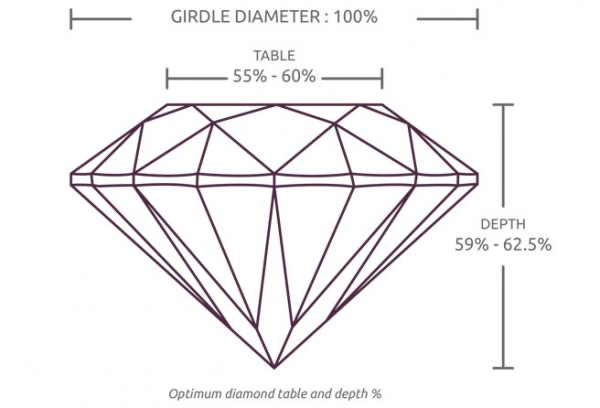

Оптимальное значение параметра `table` для алмаза [55%; 60%].

Какая доля алмазов в данных имеют оптимальное значение `table`?

In [62]:
df.filter((pl.col('table') >= 55) & (pl.col('table') <= 60)).height / len(df)

0.8439364371340954

### Задание 3

Оптимальное значение параметра `depth` для алмаза [59%; 62.5%].

Какая доля алмазов в данных имеют одновременно оптимальное значение `table` и `depth`?

Ответ округлите до сотых.

In [63]:
# ваш код здесь
df.filter((pl.col('table').is_between(55, 60)) &(pl.col('depth').is_between(59, 62.5))).height / len(df)

0.6206300529690549

### Задание 4

Сравните медианную стоимость всех алмазов, и алмазов с оптимальными table & depth. Какая больше?

In [65]:
# ваш код здесь
median_base = df['price'].median()

median_optimal = df.filter(
    (pl.col('table') >= 55) & (pl.col('table') <= 60) &
    (pl.col('depth') >= 59) & (pl.col('depth') <= 62.5)
).select(pl.col('price').median()).item()

if median_base > median_optimal:
    print(f'Медианная стоимость всех алмазов больше и равна: {median_base}')
else:
    print(f'Медианная стоимость алмазов с оптимальными table & depth больше и равна: {median_optimal}')

Медианная стоимость всех алмазов больше и равна: 2401.0


Вычислите корреляцию `table` и `price`, а затем `depth`и `price`. Какой параметр влияет на цену больше?

In [68]:
np.corrcoef(df['table'], df['price'])[0][1]

np.float64(0.12662153885758193)

In [69]:
np.corrcoef(df['depth'], df['price'])[0][1]

np.float64(-0.010831614226837235)

## Clarity - прозрачность алмаза

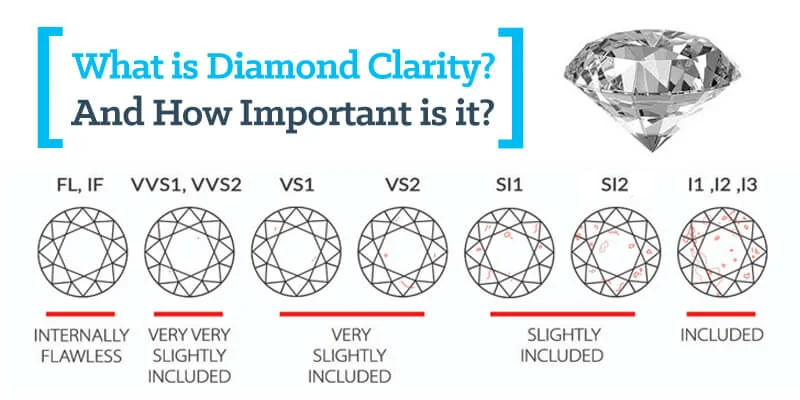

### Задание 5

Сколько различных градаций есть в столбце `clarity`?

In [70]:
# ваш код здесь
print(df['clarity'].unique())
len(df['clarity'].unique())

shape: (8,)
Series: 'clarity' [str]
[
	"SI2"
	"I1"
	"VVS1"
	"SI1"
	"VVS2"
	"IF"
	"VS1"
	"VS2"
]


8

### Задание 6

Сколько алмазов в таблице, относящихся к категории `very very slightly included`?

In [72]:
# ваш код здесь
df.filter(pl.col('clarity').is_in(["VVS1", "VVS2"])).height

8704

### Задание 7

Нарисуйте график зависимости цены алмазов от `clarity`. Алмазы какой категории в наших данных стоят дороже остальных?

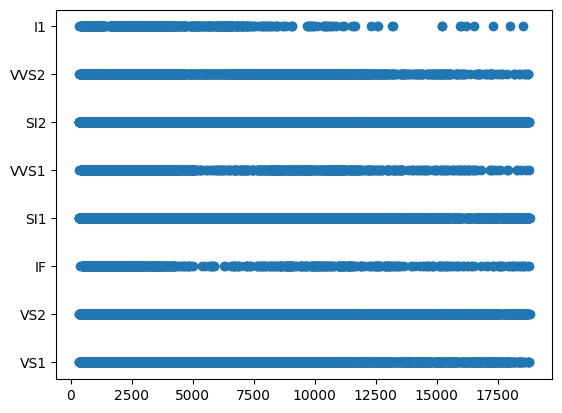

In [73]:
# ваш код здесь
plt.scatter(df['price'], df['clarity'])

### Задание 8

Для каждой пары значений категорий (`cut`,`clarity`) вычислим среднюю и медианную стоимость. Результат отсортируем по убыванию средней стоимости.

Алмазы какой огранки (`cut`) в совокупностью с некоторой категорией `clarity` имеют наибольшую среднюю стоимость?

In [75]:
# ваш код здесь
result = (
    df.group_by(['cut', 'clarity'])
    .agg(
        pl.col('price').mean().alias('mean_price'),
        pl.col('price').median().alias('median_price')
    )
    .sort('mean_price', descending=True)
)

print(result)

top_row = result.row(0, named=True)
print(f"\nНаибольшая средняя стоимость у огранки '{top_row['cut']}' и чистоты '{top_row['clarity']}'")
print(f"Средняя цена: {top_row['mean_price']:.2f}")

shape: (40, 4)
┌───────────┬─────────┬─────────────┬──────────────┐
│ cut       ┆ clarity ┆ mean_price  ┆ median_price │
│ ---       ┆ ---     ┆ ---         ┆ ---          │
│ str       ┆ str     ┆ f64         ┆ f64          │
╞═══════════╪═════════╪═════════════╪══════════════╡
│ Premium   ┆ SI2     ┆ 5556.262491 ┆ 4292.5       │
│ Fair      ┆ SI2     ┆ 5145.740175 ┆ 3681.0       │
│ Very Good ┆ SI2     ┆ 4988.709447 ┆ 4042.0       │
│ Ideal     ┆ SI2     ┆ 4761.711917 ┆ 4068.0       │
│ Good      ┆ SI2     ┆ 4544.119816 ┆ 3763.0       │
│ …         ┆ …       ┆ …           ┆ …            │
│ Ideal     ┆ VVS1    ┆ 2474.09024  ┆ 1114.0       │
│ Very Good ┆ VVS1    ┆ 2451.883249 ┆ 941.0        │
│ Ideal     ┆ IF      ┆ 2279.618257 ┆ 1020.0       │
│ Good      ┆ VVS1    ┆ 2272.391534 ┆ 977.0        │
│ Fair      ┆ IF      ┆ 1912.333333 ┆ 1849.0       │
└───────────┴─────────┴─────────────┴──────────────┘

Наибольшая средняя стоимость у огранки 'Premium' и чистоты 'SI2'
Средняя цена: 5556

## Pandas profiling

In [ ]:
# !pip install ydata_profiling
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q

     - 17.9 MB 21.1 MB/s 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 1.9 MB/s eta 0:00:00


In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
df_copy = pd.read_csv(DIAMONDS_DATASET)

profile_report = ProfileReport(df_copy, title='Pandas Profiling Report')

In [ ]:
profile_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 10/10 [00:01<00:00,  7.72it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile_report.to_file('Diamonds_report.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Домашнее задание

## 1) x, y, z

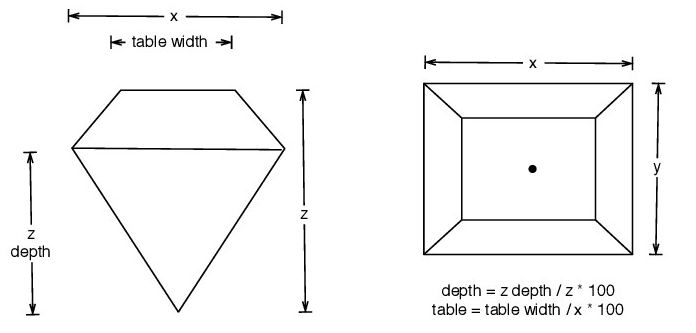

In [76]:
df.columns

['carat',
 'cut',
 'color',
 'clarity',
 'depth',
 'table',
 'price',
 "'x'",
 "'y'",
 "'z'"]

Переименуем колонки

In [78]:
df = df.rename({
    "'x'": 'x',
    "'y'": 'y',
    "'z'": 'z'
})
df.columns

['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']

### Задание 1

Для каждого из трех столбцов (`x`, `y`, `z`) вычислите медианное значение. В ответ запишите максимальное из полученных чисел без округлений.

In [79]:
# ваш код здесь
median = df[['x', 'y', 'z']].median()

print(median.max())


shape: (1, 3)
┌─────┬──────┬──────┐
│ x   ┆ y    ┆ z    │
│ --- ┆ ---  ┆ ---  │
│ f64 ┆ f64  ┆ f64  │
╞═════╪══════╪══════╡
│ 5.7 ┆ 5.71 ┆ 3.53 │
└─────┴──────┴──────┘


Для каждого из этих столбцов вычислите минимальное значение.

In [83]:
df['x'].min(), df['y'].min(), df['z'].min()

(0.0, 0.0, 0.0)

Нулевые размеры - явно ошибки.

### Задание 2

Выведите на экран все строки таблицы (только столбцы `x`,`y`,`z`), в которых хотя бы одна из координат равна нулю.

Сколько таких строк?

In [88]:
# ваш код здесь
df.filter((pl.col('x') == 0) | (pl.col('y') == 0) | (pl.col('z') == 0))

shape: (19, 10)
┌───────┬─────────┬───────┬─────────┬───┬─────────┬──────┬──────┬─────┐
│ carat ┆ cut     ┆ color ┆ clarity ┆ … ┆ price   ┆ x    ┆ y    ┆ z   │
│ ---   ┆ ---     ┆ ---   ┆ ---     ┆   ┆ ---     ┆ ---  ┆ ---  ┆ --- │
│ f64   ┆ str     ┆ str   ┆ str     ┆   ┆ f64     ┆ f64  ┆ f64  ┆ f64 │
╞═══════╪═════════╪═══════╪═════════╪═══╪═════════╪══════╪══════╪═════╡
│ 2.02  ┆ Premium ┆ H     ┆ VS2     ┆ … ┆ 18207.0 ┆ 8.02 ┆ 7.95 ┆ 0.0 │
│ 0.71  ┆ Good    ┆ F     ┆ SI2     ┆ … ┆ 2130.0  ┆ 0.0  ┆ 0.0  ┆ 0.0 │
│ 1.01  ┆ Premium ┆ H     ┆ I1      ┆ … ┆ 3167.0  ┆ 6.66 ┆ 6.6  ┆ 0.0 │
│ 2.25  ┆ Premium ┆ H     ┆ SI2     ┆ … ┆ 18034.0 ┆ 0.0  ┆ 0.0  ┆ 0.0 │
│ 2.2   ┆ Premium ┆ H     ┆ SI1     ┆ … ┆ 17265.0 ┆ 8.42 ┆ 8.37 ┆ 0.0 │
│ …     ┆ …       ┆ …     ┆ …       ┆ … ┆ …       ┆ …    ┆ …    ┆ …   │
│ 2.18  ┆ Premium ┆ H     ┆ SI2     ┆ … ┆ 12631.0 ┆ 8.49 ┆ 8.45 ┆ 0.0 │
│ 1.0   ┆ Premium ┆ G     ┆ SI2     ┆ … ┆ 3142.0  ┆ 6.55 ┆ 6.48 ┆ 0.0 │
│ 1.15  ┆ Ideal   ┆ G     ┆ VS2     ┆ … ┆ 5564.0  ┆ 6.88 ┆ 6.83 ┆ 0.0 │
│ 1.12  ┆ Premium ┆ G     ┆ I1      ┆ … ┆ 2383.0  ┆ 6.71 ┆ 6.67 ┆ 0.0 │
│ 1.5   ┆ Good    ┆ G     ┆ I1      ┆ … ┆ 4731.0  ┆ 7.15 ┆ 7.04 ┆ 0.0 │
└───────┴─────────┴───────┴─────────┴───┴─────────┴──────┴──────┴─────┘

### Задание 3

Удалите из таблицы эти строки. Сколько строк осталось в таблице?

In [89]:
df = df.filter(
    ~((pl.col('x') == 0) | (pl.col('y') == 0) | (pl.col('z') == 0))
)

In [90]:
len(df)

53786

### Задание 4

Вычислите корреляцию между каждым из этих столбцов и `price`. Какой столбец коррелирует с ценой алмаза больше всего?

In [92]:
# ваш код здесь
correlations = {
    col: df.select(pl.corr(col, "price")).item()
    for col in df.columns
    if df[col].dtype in [pl.Int64, pl.Float64, pl.Float32, pl.Int32] and col != "price"
}
correlations

{'carat': 0.9164917915624511,
 'depth': -0.010928194985671562,
 'table': 0.12672156311066193,
 'x': 0.8871831258995108,
 'y': 0.867664672031099,
 'z': 0.8680889917330575}

больше всего коррелирует carat

### Задание 5

Постройте scatter-plot для отражения зависимости между ценой алмаза и координатой, наиболее с ней коррелирующей. На какую зависимость она больше всего похожа?

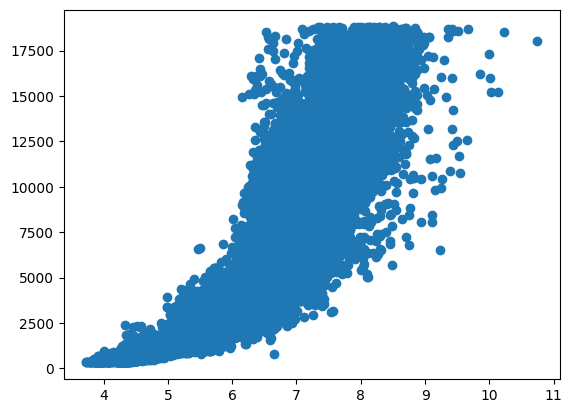

In [93]:
# ваш код здесь
plt.scatter(df['x'], df['price'])

Похоже на экспоненциальную зависимость


### Задание 6

Какой процент среди всех алмазов имеет `x` и `y` размеры, превышающие средние значения (по `x` и `y`)? Ответ округлите до целого числа.

In [94]:
# ваш код здесь
percentage = (df.select(
    ((pl.col('x') > pl.col('x').mean()) &
     (pl.col('y') > pl.col('y').mean())).sum() /
    pl.len() * 100
).item())

print(f"{round(percentage)} %")

47 %


### Задание 7

Какая доля среди крупных алмазов имеет `z`-размеры, меньшие медианного? Ответ округлите до четырех знаков после запятой.

In [98]:
# ваш код здесь
z_median = df['z'].median()

percentage = df.select(
    (
        ((pl.col('carat') >= 1) & (pl.col('z') < z_median)).sum() /
        (pl.col('carat') >= 1).sum()
    ) * 100
).item()

print(round(percentage, 4))

0.0213


## 2) Color

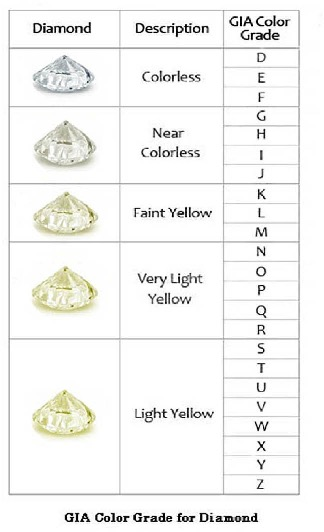

### Задание 8

К каким категориям (Description) из градации выше относятся алмазы в данных?

In [100]:
# ваш код здесь
df['color'].unique()

shape: (7,)
Series: 'color' [str]
[
	"D"
	"I"
	"F"
	"J"
	"E"
	"G"
	"H"
]

Относятся к Colorless, Near Colorless

### Задание 9

Нарисуйте график, отражающий зависимость стоимости алмазов от его категории цвета.

Алмазы какого цвета стоят дороже остальных?

/tmp/ipython-input-582727225.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='color', y='price', data = df, palette='winter')


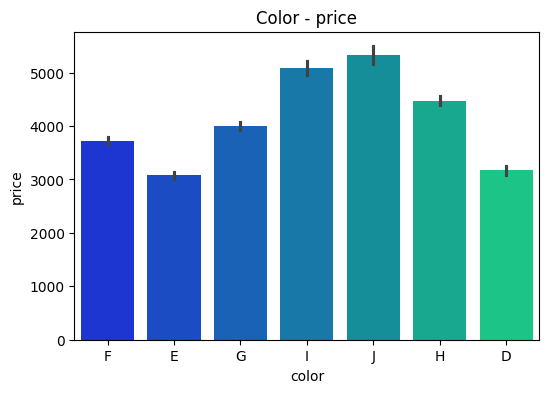

In [101]:
# ваш код здесь
plt.figure(figsize=(6,4))

sns.barplot(x='color', y='price', data = df, palette='winter')
plt.title('Color - price')
plt.show();

Алмазы цвета J дороже остальных

### Задание 10

Для каждого цвета алмаза вычислите медианную стоимость и медианный вес (в каратах). Отсортируйте полученную при помощи groupby таблицу по убыванию медианной стоимости.

Верно ли, что при убывании PriceMedian, сгруппированной по цвету, CaratMedian также убывает? (не возрастает)

In [104]:
# ваш код здесь
df.group_by('color').agg(
    pl.col('price').median().alias('PriceMedian'),
    pl.col('carat').median().alias('CaratMedian')
).sort('PriceMedian', descending=True)

shape: (7, 3)
┌───────┬─────────────┬─────────────┐
│ color ┆ PriceMedian ┆ CaratMedian │
│ ---   ┆ ---         ┆ ---         │
│ str   ┆ f64         ┆ f64         │
╞═══════╪═════════════╪═════════════╡
│ J     ┆ 4234.5      ┆ 1.11        │
│ I     ┆ 3721.5      ┆ 1.0         │
│ H     ┆ 3449.5      ┆ 0.9         │
│ F     ┆ 2345.0      ┆ 0.7         │
│ G     ┆ 2242.0      ┆ 0.7         │
│ D     ┆ 1842.0      ┆ 0.54        │
│ E     ┆ 1741.0      ┆ 0.54        │
└───────┴─────────────┴─────────────┘

Да, верно


### Задание 11

Вычислите среднюю стоимость алмазов по каждой тройке категорий (`cut`,`color`,`clarity`). Какие алмазы дороже остальных?

В ответе запишите тройку названий в скобках через запятую, без кавычек и пробелов. Например, (Premium,D,IF)

In [106]:
# ваш код здесь
res = (
    df.group_by(['cut', 'color', 'clarity'])
    .agg(
        pl.col('price').mean().alias('AvgPrice'),
        pl.len().alias('Count')
    )
    .sort('AvgPrice', descending=True)
)

print("Топ 5 самых дорогих комбинаций:")
print(res.head())

Топ 5 самых дорогих комбинаций:
shape: (5, 5)
┌───────────┬───────┬─────────┬──────────────┬───────┐
│ cut       ┆ color ┆ clarity ┆ AvgPrice     ┆ Count │
│ ---       ┆ ---   ┆ ---     ┆ ---          ┆ ---   │
│ str       ┆ str   ┆ str     ┆ f64          ┆ u32   │
╞═══════════╪═══════╪═════════╪══════════════╪═══════╡
│ Very Good ┆ D     ┆ IF      ┆ 10298.26087  ┆ 23    │
│ Good      ┆ D     ┆ IF      ┆ 10030.333333 ┆ 9     │
│ Ideal     ┆ J     ┆ I1      ┆ 9454.0       ┆ 2     │
│ Premium   ┆ D     ┆ IF      ┆ 9056.5       ┆ 10    │
│ Premium   ┆ J     ┆ SI2     ┆ 7550.285714  ┆ 161   │
└───────────┴───────┴─────────┴──────────────┴───────┘


Практика

In [ ]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [ ]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [ ]:
df_encoded = df.copy()

In [ ]:
cut_order = {'Ideal': 4, 'Premium': 3, 'Very Good': 2, 'Good': 1, 'Fair': 0}
clarity_map = {'I1': 7, 'SI2': 6, 'SI1': 5, 'VS2': 4, 'VS1': 3, 'VVS1': 2, 'VVS2': 1, 'IF': 0}

df_encoded['cut_encoded'] = df_encoded['cut'].map(cut_order)
df_encoded['clarity_encoded'] = df_encoded['clarity'].map(clarity_map)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

color_col = df[['color']]

encoder = OneHotEncoder(sparse_output=False)
encoded_array = encoder.fit_transform(color_col)

encoded_df = pd.DataFrame(
    encoded_array,
    columns=encoder.get_feature_names_out(['color']),
    index=df.index
)

df_encoded = pd.concat([df_encoded, encoded_df], axis=1)

In [ ]:
df_encoded = df_encoded.drop(['cut', 'clarity', 'color'], axis=1)


In [ ]:
corr_matrix = df_encoded.corr()
corr_matrix

carat     depth     table     price         x         y  \
carat            1.000000  0.028384  0.180016  0.916492  0.972709  0.948870   
depth            0.028384  1.000000 -0.294247 -0.010928 -0.024345 -0.026725   
table            0.180016 -0.294247  1.000000  0.126722  0.195467  0.183742   
price            0.916492 -0.010928  0.126722  1.000000  0.887183  0.867665   
x                0.972709 -0.024345  0.195467  0.887183  1.000000  0.974774   
y                0.948870 -0.026725  0.183742  0.867665  0.974774  1.000000   
z                0.955969  0.094473  0.151712  0.868089  0.975395  0.956581   
cut_encoded     -0.132324 -0.215091 -0.432445 -0.052539 -0.124843 -0.120769   
clarity_encoded  0.340676  0.066041  0.156773  0.137791  0.361829  0.348146   
color_D         -0.110872 -0.014861 -0.008523 -0.072195 -0.105822 -0.103667   
color_E         -0.138693 -0.029379  0.007222 -0.100770 -0.134817 -0.130640   
color_F         -0.059177 -0.017546 -0.004808 -0.023869 -0.047602 -0.046498   
color_G         -0.029116  0.004023 -0.039104  0.008736 -0.024547 -0.024382   
color_H          0.101529  0.025613  0.011610  0.058500  0.095938  0.093566   
color_I          0.159167  0.023895  0.017560  0.096487  0.145826  0.142222   
color_J          0.180763  0.022006  0.037408  0.082013  0.165393  0.161461   

                        z  cut_encoded  clarity_encoded   color_D   color_E  \
carat            0.955969    -0.132324         0.340676 -0.110872 -0.138693   
depth            0.094473    -0.215091         0.066041 -0.014861 -0.029379   
table            0.151712    -0.432445         0.156773 -0.008523  0.007222   
price            0.868089    -0.052539         0.137791 -0.072195 -0.100770   
x                0.975395    -0.124843         0.361829 -0.105822 -0.134817   
y                0.956581    -0.120769         0.348146 -0.103667 -0.130640   
z                1.000000    -0.149079         0.359300 -0.105760 -0.133819   
cut_encoded     -0.149079     1.000000        -0.182194  0.007679 -0.003926   
clarity_encoded  0.359300    -0.182194         1.000000  0.076906  0.020277   
color_D         -0.105760     0.007679         0.076906  1.000000 -0.178629   
color_E         -0.133819    -0.003926         0.020277 -0.178629  1.000000   
color_F         -0.048874    -0.007303        -0.022568 -0.175731 -0.218555   
color_G         -0.023599     0.039937        -0.130096 -0.194969 -0.242480   
color_H          0.096051    -0.010634         0.035714 -0.161544 -0.200911   
color_I          0.144964    -0.008728         0.021798 -0.126711 -0.157589   
color_J          0.165001    -0.036131         0.039561 -0.088846 -0.110497   

                  color_F   color_G   color_H   color_I   color_J  
carat           -0.059177 -0.029116  0.101529  0.159167  0.180763  
depth           -0.017546  0.004023  0.025613  0.023895  0.022006  
table           -0.004808 -0.039104  0.011610  0.017560  0.037408  
price           -0.023869  0.008736  0.058500  0.096487  0.082013  
x               -0.047602 -0.024547  0.095938  0.145826  0.165393  
y               -0.046498 -0.024382  0.093566  0.142222  0.161461  
z               -0.048874 -0.023599  0.096051  0.144964  0.165001  
cut_encoded     -0.007303  0.039937 -0.010634 -0.008728 -0.036131  
clarity_encoded -0.022568 -0.130096  0.035714  0.021798  0.039561  
color_D         -0.175731 -0.194969 -0.161544 -0.126711 -0.088846  
color_E         -0.218555 -0.242480 -0.200911 -0.157589 -0.110497  
color_F          1.000000 -0.238546 -0.197651 -0.155032 -0.108704  
color_G         -0.238546  1.000000 -0.219288 -0.172004 -0.120604  
color_H         -0.197651 -0.219288  1.000000 -0.142516 -0.099928  
color_I         -0.155032 -0.172004 -0.142516  1.000000 -0.078381  
color_J         -0.108704 -0.120604 -0.099928 -0.078381  1.000000

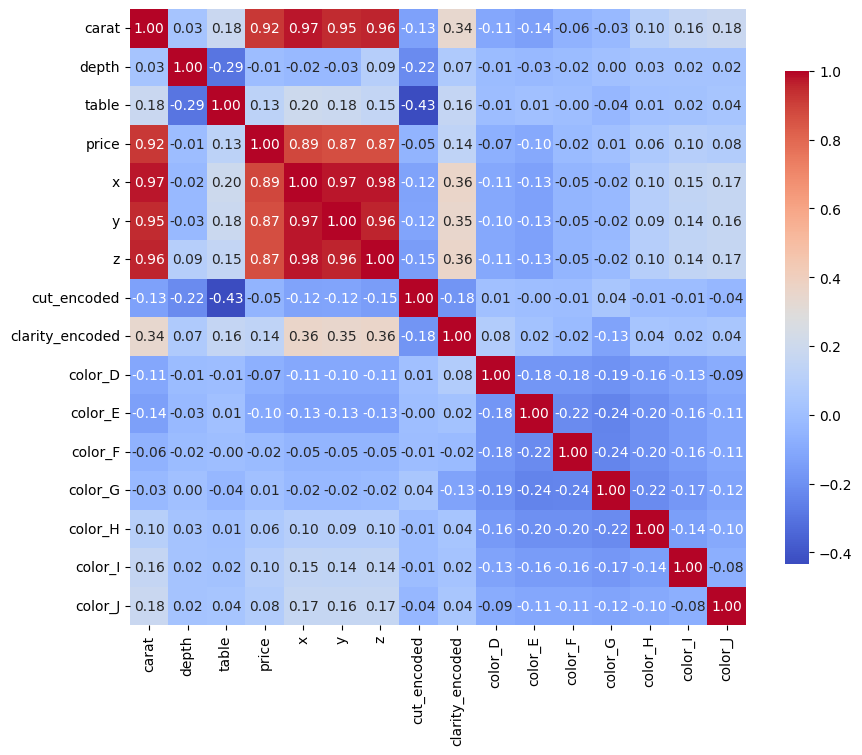

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    square=True,
    cbar_kws={"shrink": .8}
)
plt.show()

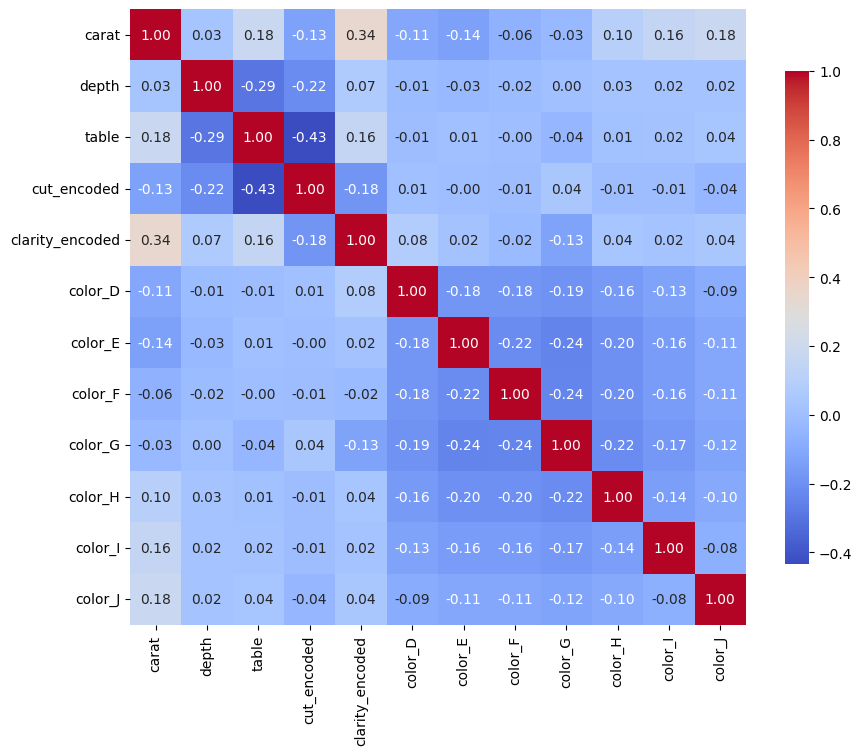

In [ ]:
corr_matrix = df_encoded.drop(['price','x','y','z'], axis=1).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    square=True,
    cbar_kws={"shrink": .8}
)
plt.show()

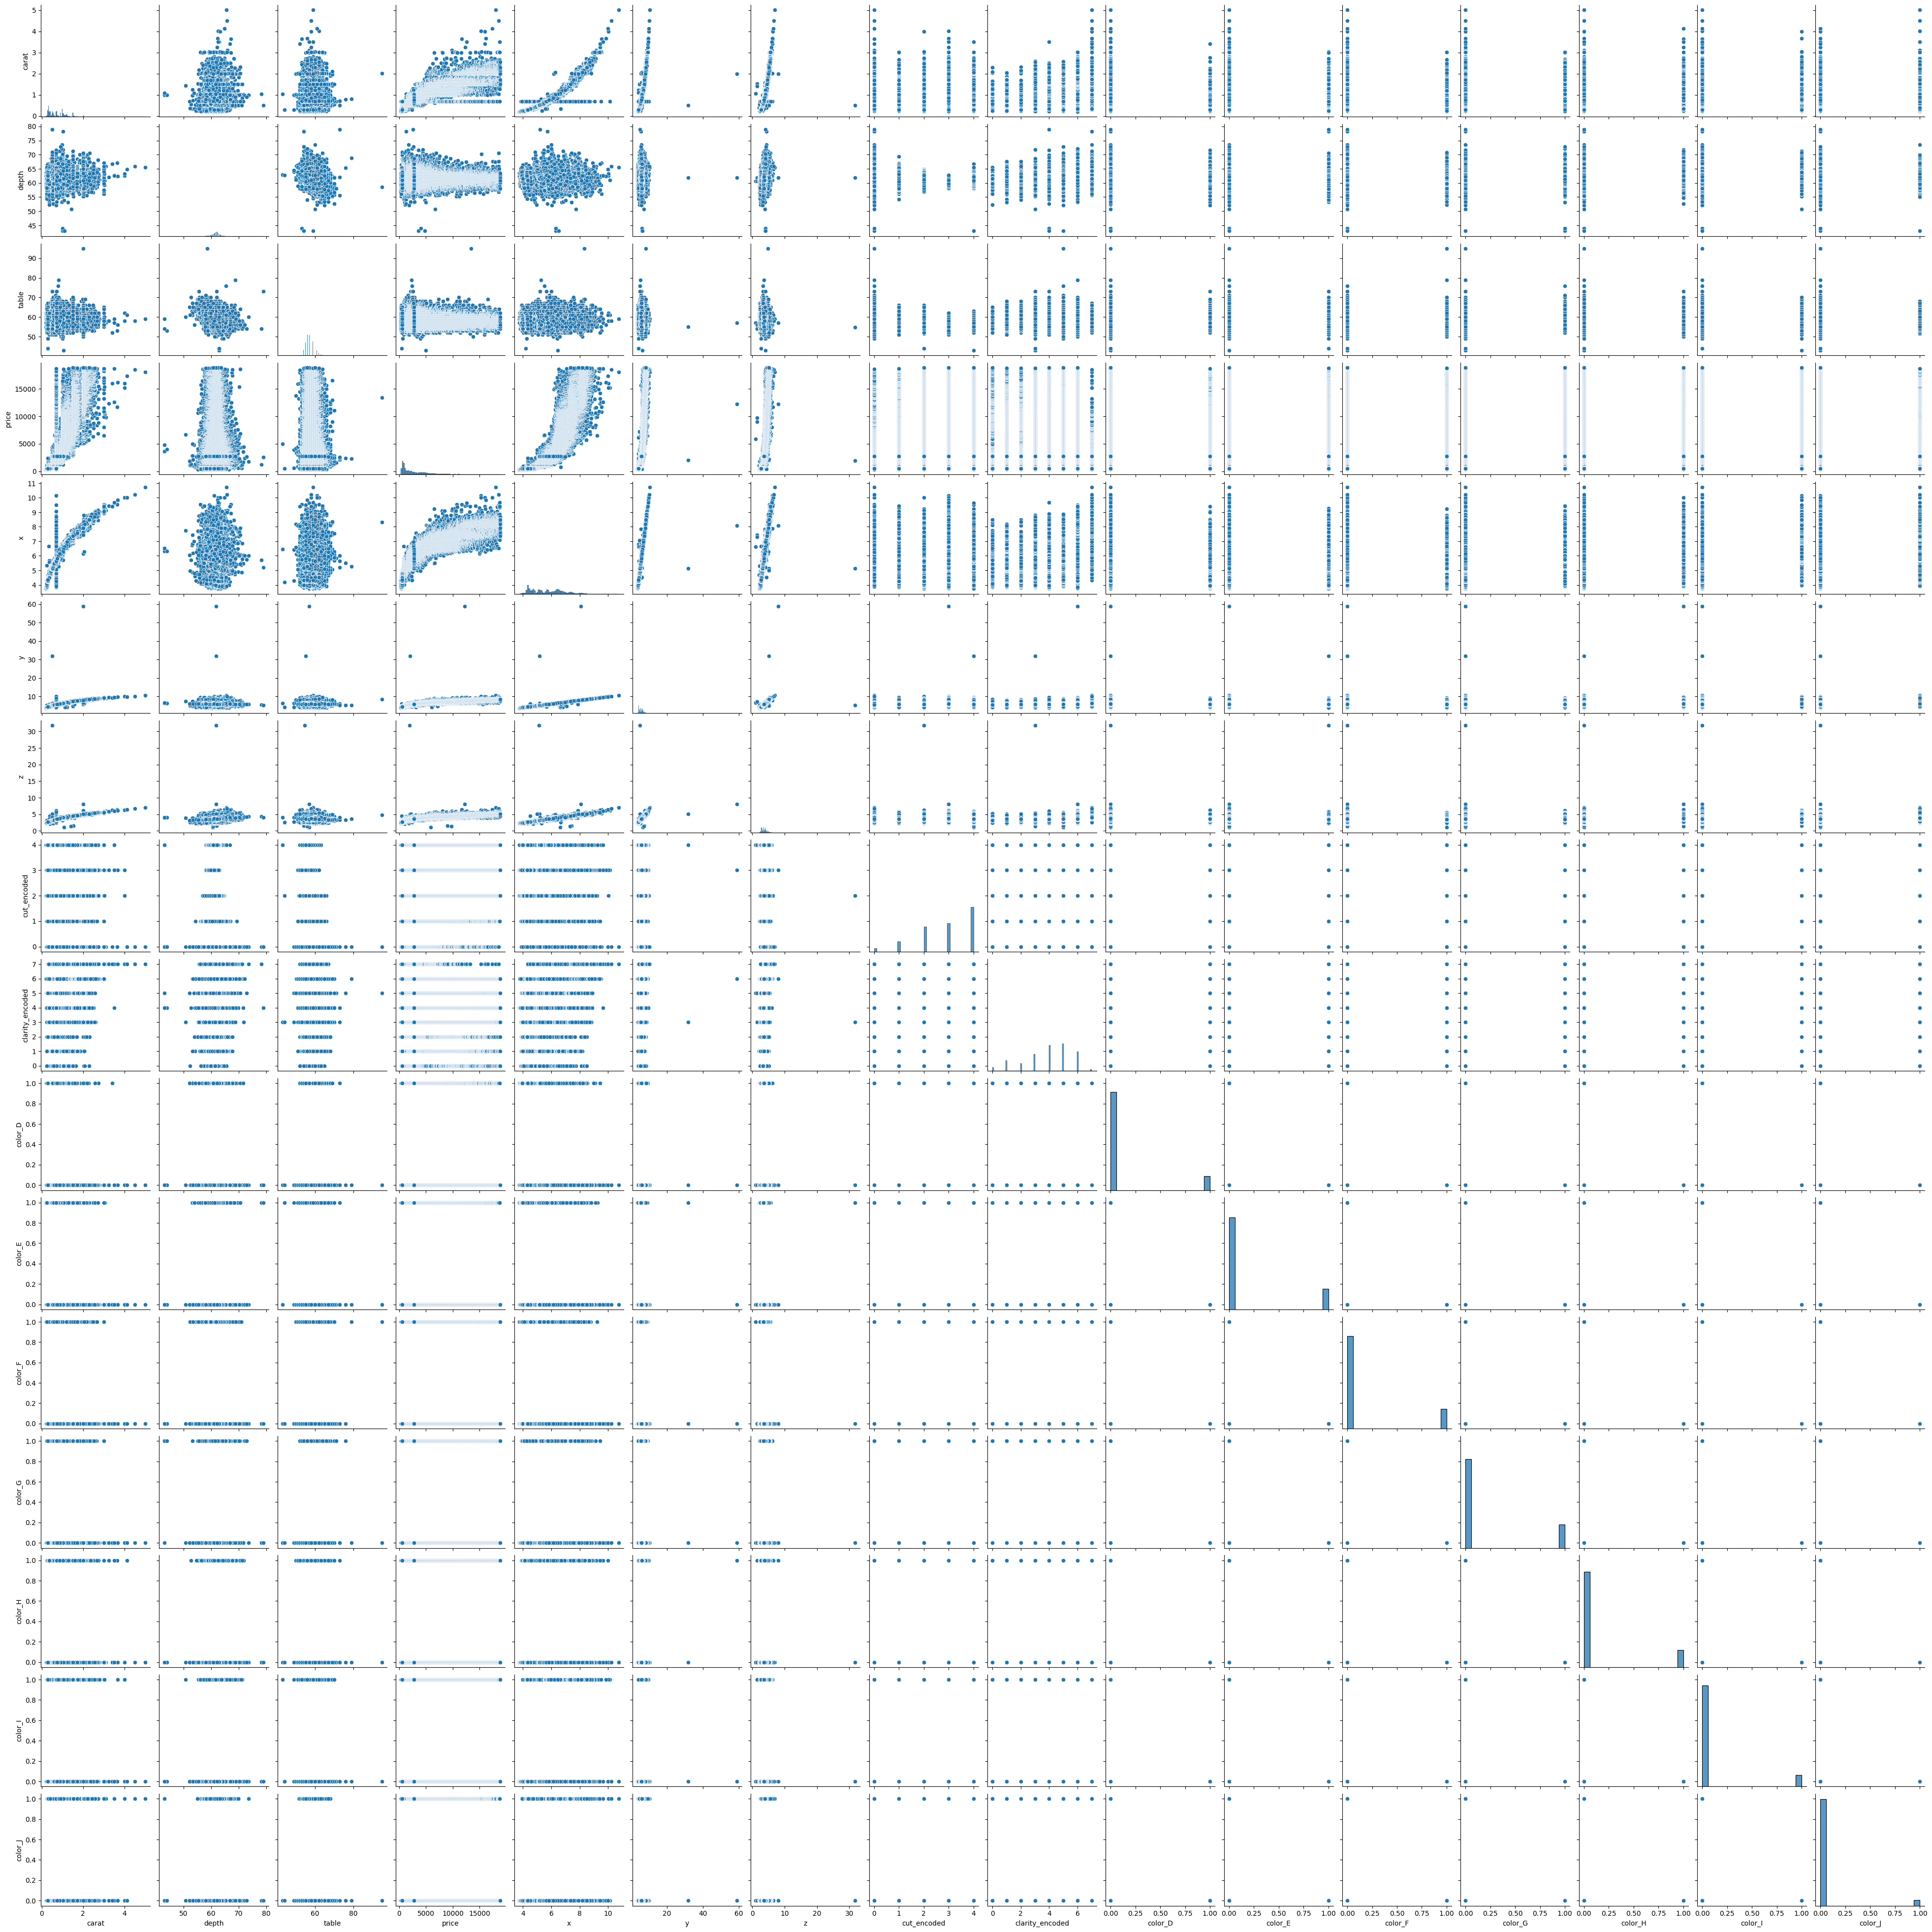

In [ ]:
sns.pairplot(df_encoded)

In [ ]:
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rndForest = RandomForestRegressor(n_estimators=100, random_state=43)
rndForest.fit(X, y)

feat_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': rndForest.feature_importances_
}).sort_values(by='importance', ascending=False)
feat_importances

feature  importance
4                 y    0.865379
7   clarity_encoded    0.062606
0             carat    0.015468
14          color_J    0.010908
3                 x    0.010302
13          color_I    0.007828
5                 z    0.006360
12          color_H    0.005618
1             depth    0.003085
8           color_D    0.002790
11          color_G    0.002431
2             table    0.002295
9           color_E    0.001763
10          color_F    0.001596
6       cut_encoded    0.001572

In [ ]:
from sklearn.inspection import permutation_importance

res = permutation_importance(rndForest, X, y, n_repeats=10, n_jobs=-1, random_state=12)

sorted_idx = res.importances_mean.argsort()[::-1]

for i in sorted_idx:
    print(f"{X.columns[i]}:" f"{res.importances_mean[i]:.4f} ")

y:1.2430 
clarity_encoded:0.1682 
carat:0.0528 
color_J:0.0409 
x:0.0340 
color_I:0.0326 
z:0.0261 
color_H:0.0191 
color_D:0.0129 
color_G:0.0097 
color_E:0.0084 
color_F:0.0076 
depth:0.0037 
table:0.0032 
cut_encoded:0.0031 


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gradBoost = GradientBoostingRegressor(random_state=11)
gradBoost.fit(X, y)

feat_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': gradBoost.feature_importances_
}).sort_values(by='importance', ascending=False)
feat_importances

feature  importance
4                 y    0.800097
5                 z    0.097301
7   clarity_encoded    0.060202
3                 x    0.011154
14          color_J    0.009160
0             carat    0.008536
13          color_I    0.005610
8           color_D    0.002046
10          color_F    0.001777
12          color_H    0.001547
9           color_E    0.001258
11          color_G    0.000665
6       cut_encoded    0.000368
1             depth    0.000246
2             table    0.000031

In [ ]:
from sklearn.inspection import permutation_importance

res = permutation_importance(gradBoost, X, y, n_repeats=10, n_jobs=-1, random_state=12)

sorted_idx = res.importances_mean.argsort()[::-1]

for i in sorted_idx:
    print(f"{X.columns[i]}:" f"{res.importances_mean[i]:.4f} ")

y:0.9738 
z:0.1360 
clarity_encoded:0.1339 
x:0.0233 
color_J:0.0212 
carat:0.0168 
color_I:0.0108 
color_D:0.0066 
color_E:0.0036 
color_H:0.0033 
color_F:0.0026 
cut_encoded:0.0011 
color_G:0.0005 
depth:0.0004 
table:0.0000 


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

linReg = LinearRegression()
linReg.fit(X_scaled, y)

feat_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': linReg.coef_
}).sort_values(by='importance', ascending=False)
feat_importances

feature   importance
0             carat  4185.283453
8           color_D   205.471146
9           color_E   157.914145
6       cut_encoded   135.047421
10          color_F   114.216658
4                 y    89.921587
11          color_G    41.530599
5                 z   -33.298311
2             table   -49.894303
1             depth   -66.645380
3                 x  -121.762101
12          color_H  -123.086755
13          color_I  -220.146117
14          color_J  -354.926889
7   clarity_encoded  -802.738595

In [ ]:
from sklearn.inspection import permutation_importance

res = permutation_importance(linReg, X, y, n_repeats=10, n_jobs=-1, random_state=12)

sorted_idx = res.importances_mean.argsort()[::-1]

for i in sorted_idx:
    print(f"{X.columns[i]}:" f"{res.importances_mean[i]:.4f} ")

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


carat:1.0577 
y:0.0296 
clarity_encoded:0.0081 
color_D:0.0003 
depth:-0.0000 
color_F:-0.0001 
color_G:-0.0002 
color_J:-0.0006 
color_H:-0.0006 
color_E:-0.0009 
color_I:-0.0011 
cut_encoded:-0.0053 
table:-0.0060 
z:-0.0064 
x:-0.0362 


Обучение моделий

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train_binned = pd.qcut(y_train, q=5, labels=False)

In [ ]:
X

carat  depth  table     x     y     z  cut_encoded  clarity_encoded  \
0       0.23   61.5   55.0  3.95  3.98  2.43            4                6   
1       0.21   59.8   61.0  3.89  3.84  2.31            3                5   
2       0.23   56.9   65.0  4.05  4.07  2.31            1                3   
3       0.29   62.4   58.0  4.20  4.23  2.63            3                4   
4       0.31   63.3   58.0  4.34  4.35  2.75            1                6   
...      ...    ...    ...   ...   ...   ...          ...              ...   
53800   0.72   60.8   57.0  5.75  5.76  3.50            4                5   
53801   0.72   63.1   55.0  5.69  5.75  3.61            1                5   
53802   0.70   62.8   60.0  5.66  5.68  3.56            2                5   
53803   0.86   61.0   58.0  6.15  6.12  3.74            3                6   
53804   0.75   62.2   55.0  5.83  5.87  3.64            4                6   

       color_D  color_E  color_F  color_G  color_H  color_I  color_J  
0          0.0      1.0      0.0      0.0      0.0      0.0      0.0  
1          0.0      1.0      0.0      0.0      0.0      0.0      0.0  
2          0.0      1.0      0.0      0.0      0.0      0.0      0.0  
3          0.0      0.0      0.0      0.0      0.0      1.0      0.0  
4          0.0      0.0      0.0      0.0      0.0      0.0      1.0  
...        ...      ...      ...      ...      ...      ...      ...  
53800      1.0      0.0      0.0      0.0      0.0      0.0      0.0  
53801      1.0      0.0      0.0      0.0      0.0      0.0      0.0  
53802      1.0      0.0      0.0      0.0      0.0      0.0      0.0  
53803      0.0      0.0      0.0      0.0      1.0      0.0      0.0  
53804      1.0      0.0      0.0      0.0      0.0      0.0      0.0  

[53786 rows x 15 columns]

In [ ]:
features_2 = ['y', 'clarity_encoded']
features_3 = ['cut_encoded', 'carat', 'clarity_encoded']
features_all = ['carat',	'depth',	'table',	'x',	'y',	'z',	'cut_encoded',	'clarity_encoded',	'color_D',	'color_E',	'color_F',	'color_G',	'color_H', 'color_I',	'color_J']

In [ ]:
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(
        n_estimators=100, max_depth=10, min_samples_split=5,
        min_samples_leaf=2, random_state=42, n_jobs=-1
    ),
    'GradientBoosting': GradientBoostingRegressor(
        n_estimators=100, learning_rate=0.1, max_depth=5,
        min_samples_split=5, min_samples_leaf=2, random_state=42
    )
}

In [ ]:
def train_and_evaluate_model(model, features):
    X_train_f = X_train[features]
    X_test_f = X_test[features]

    if isinstance(model, LinearRegression):
        scaler = StandardScaler()
        X_train_sc = scaler.fit_transform(X_train_f)
        X_test_sc = scaler.transform(X_test_f)
        cv = cross_val_score(model, X_train_sc, y_train,
                             cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42).split(X_train_f, y_train_binned),
                             scoring='r2')
        model.fit(X_train_sc, y_train)
        y_pred_test = model.predict(X_test_sc)
    else:
        cv = cross_val_score(model, X_train_f, y_train,
                             cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42).split(X_train_f, y_train_binned),
                             scoring='r2')
        model.fit(X_train_f, y_train)
        y_pred_test = model.predict(X_test_f)

    test_r2 = r2_score(y_test, y_pred_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    test_mae = mean_absolute_error(y_test, y_pred_test)

    return {
        'model': model,
        'cv_mean_r2': cv.mean(),
        'test_r2': test_r2,
        'test_rmse': test_rmse,
        'test_mae': test_mae
    }

In [ ]:
all_results = {}
for name, feats in [('с 2 признаками', features_2), ('с 3 признаками', features_3), ('с всеми признаками', features_all)]:
    all_results[name] = {}
    for model_name, model in models.items():
        result = train_and_evaluate_model(model, feats)
        all_results[name][model_name] = result

comparison_data = []
for feat_set, models_res in all_results.items():
    for model_name, res in models_res.items():
        comparison_data.append({
            'Набор признаков': feat_set,
            'Модель': model_name,
            'CV R²': f"{res['cv_mean_r2']:.4f}",
            'Test R²': f"{res['test_r2']:.4f}",
            'Test RMSE': f"{res['test_rmse']:.2f}",
            'Test MAE': f"{res['test_mae']:.2f}"
        })

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

   Набор признаков           Модель  CV R² Test R² Test RMSE Test MAE
    с 2 признаками LinearRegression 0.7692  0.8231   1643.93  1195.81
    с 2 признаками     RandomForest 0.9342  0.9354    993.57   549.08
    с 2 признаками GradientBoosting 0.9361  0.9371    980.08   543.58
    с 3 признаками LinearRegression 0.8762  0.8760   1376.56   917.60
    с 3 признаками     RandomForest 0.9280  0.9312   1024.89   547.70
    с 3 признаками GradientBoosting 0.9288  0.9315   1022.84   546.52
с всеми признаками LinearRegression 0.8926  0.8938   1273.95   855.23
с всеми признаками     RandomForest 0.9763  0.9783    576.13   315.23
с всеми признаками GradientBoosting 0.9801  0.9810    538.76   292.25
